![Bilby Stampede](https://www.assemblyai.com/_next/static/image/src/modules/layout/branding/logo/assets/default.a451cfb665ce63899754f3d832630ece.svg)
   
Note book tests [assembly ai api](https://docs.assemblyai.com/#introduction)


[Review of assembly API](https://nordicapis.com/review-of-assemblyai-speech-to-text-api/)

In [1]:
#%%capture
#!pip install requests
#!conda install -c conda-forge librosa


In [2]:
# basics
import numpy as np
import pandas as pd
import glob # unix style pathname pattern expansion -- whatever that means 🙈
import os # to handle local files
import requests # to handle apis
import IPython # interactive components
import librosa # sound utility 
import librosa.display # plots
import matplotlib.pyplot as plt # plots
from matplotlib.pyplot import specgram # plots
from datetime import datetime as dt # timers 
%matplotlib inline


Accessing local files for testing...

In [3]:
# accessing saved audio files
ROOT = '/Users/neelanpather/dev/amr2wav/1/converted'
os.chdir(ROOT)
FILES = os.listdir()
FILES

['preso_log_power_specgram.png',
 'denoise',
 '.DS_Store',
 'specgram.png',
 '6.wav',
 'amr1.wav',
 'preso_specgram.png',
 '5.wav',
 'amr2.wav',
 '4.wav',
 '0000000229520431#-10569#MAGANYAM#LPT-MAGANYAM#20220209100209148.wav',
 '1.wav',
 'log_power_specgram.png',
 'preso_waves.png',
 '3.wav',
 'waves.png',
 '2.wav',
 'enhanced',
 'sound_eye',
 '0000000528184405#-10557#PORTIAM13#TCRAMDA6-295#20220209071824490.wav']

/Users/neelanpather/dev/amr2wav/1/converted/2.wav


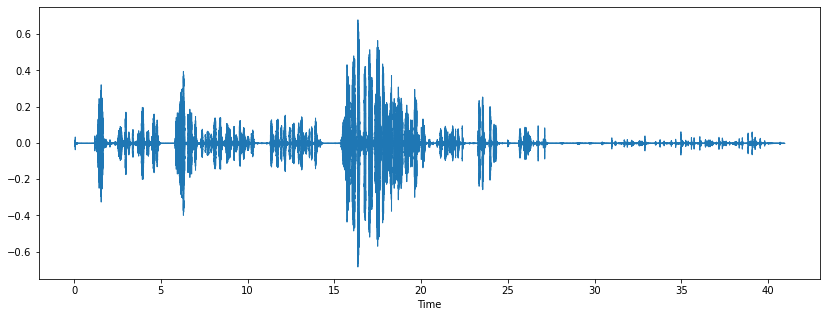

In [24]:
file = os.path.join(ROOT, FILES[-4])
print(file)
# get amplitude, sampling rate
y, sr = librosa.load(file)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
IPython.display.Audio(y, rate=sr)


In [25]:
# environment variables
FILE_PATHS = []
NAMES = []
for i in range (0, len(FILES)):
    if '.wav' in FILES[i]:
        NAMES.append(FILES[i])
        FILE_PATHS.append(os.path.join(ROOT, FILES[i]))
if not os.path.exists(os.path.join(ROOT, "sound_eye")): os.mkdir(os.path.join(ROOT, "sound_eye"))
SAVE_PATH = os.path.join(ROOT, "sound_eye")
DPI=200
TOKEN='291224eea5ab48a4ae5b3a6f1ba92250' # to access assembly ai SaaS


##########################################################
############# Examples chosen for preo ###################
##########################################################

# 2.wav: heavy south african accent 
# 4.wav: in an african language
# 3.wav: angry customer then inaudable

FILE_PATHS = list(pd.Series(FILE_PATHS)[[8, 7, 4]])
NAMES = list(pd.Series(NAMES)[[8, 7, 4]])

##  **Sound Eye** 🔊👁

###working###

§§§ loading sound files...
time taken to load sound files 0:00:04.363444

§§§ plotting wavelength...
time taken to plot wavelength 0:00:03.388765

§§§ plotting spectrogram...
§ time taken to plot spectrogram 0:01:27.959659

§§§ plotting log_power_spectrogram...
§ time taken to plot log_power_spectrogram 0:00:10.357687


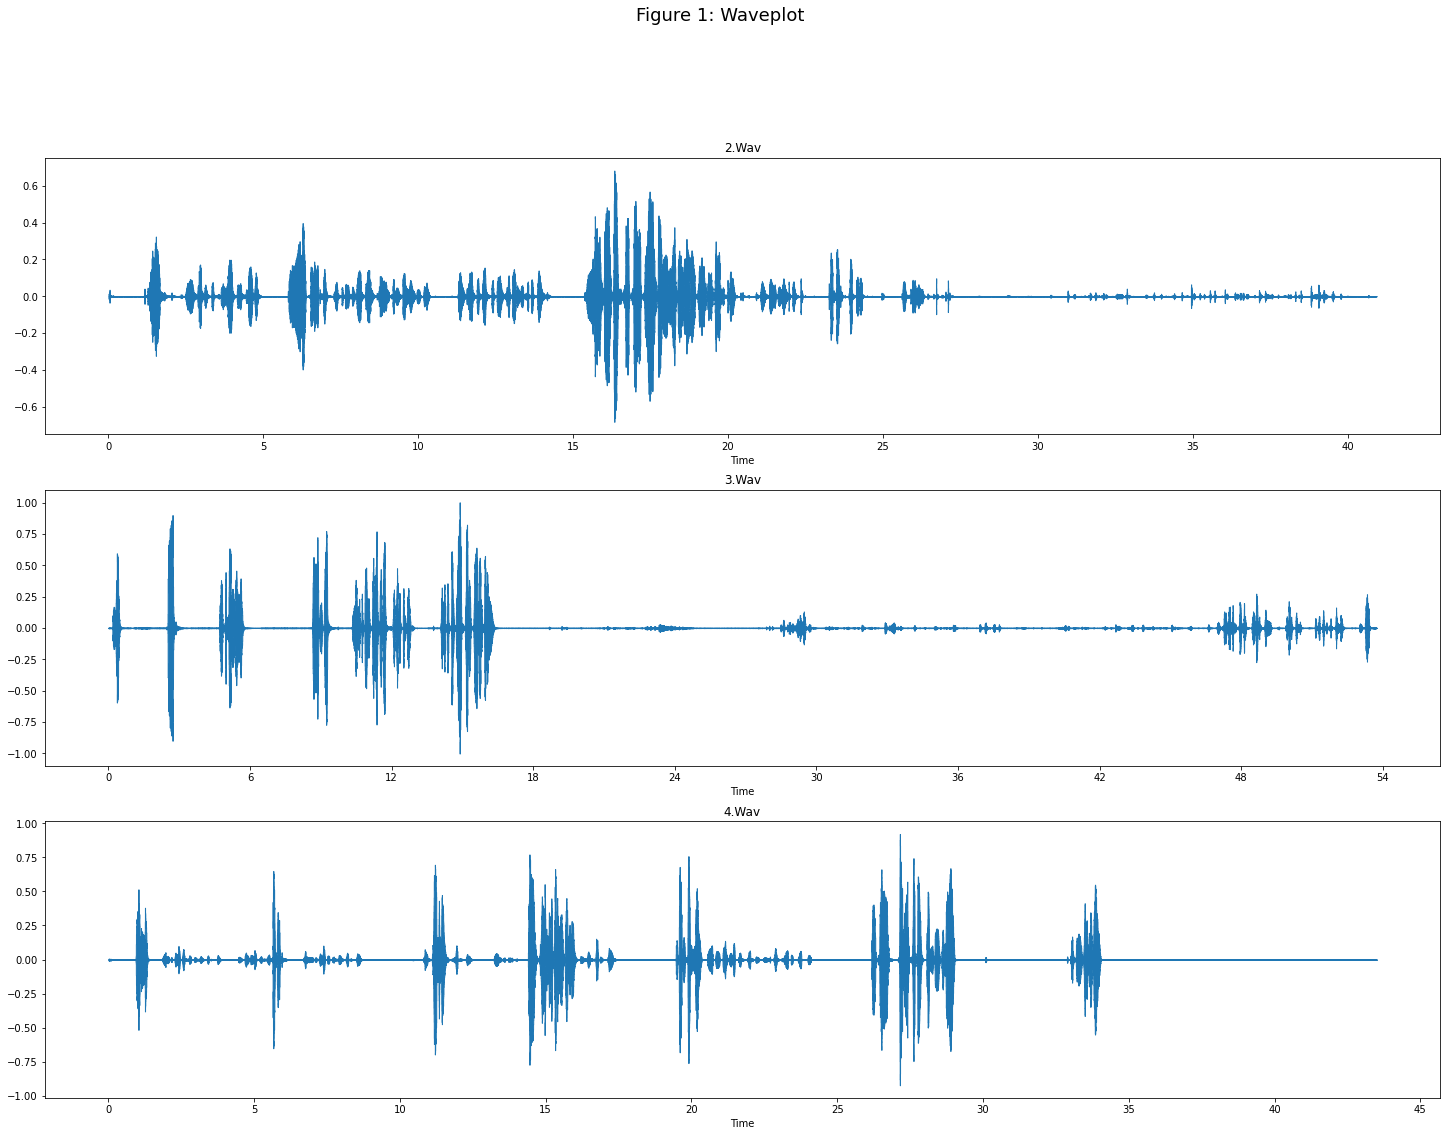

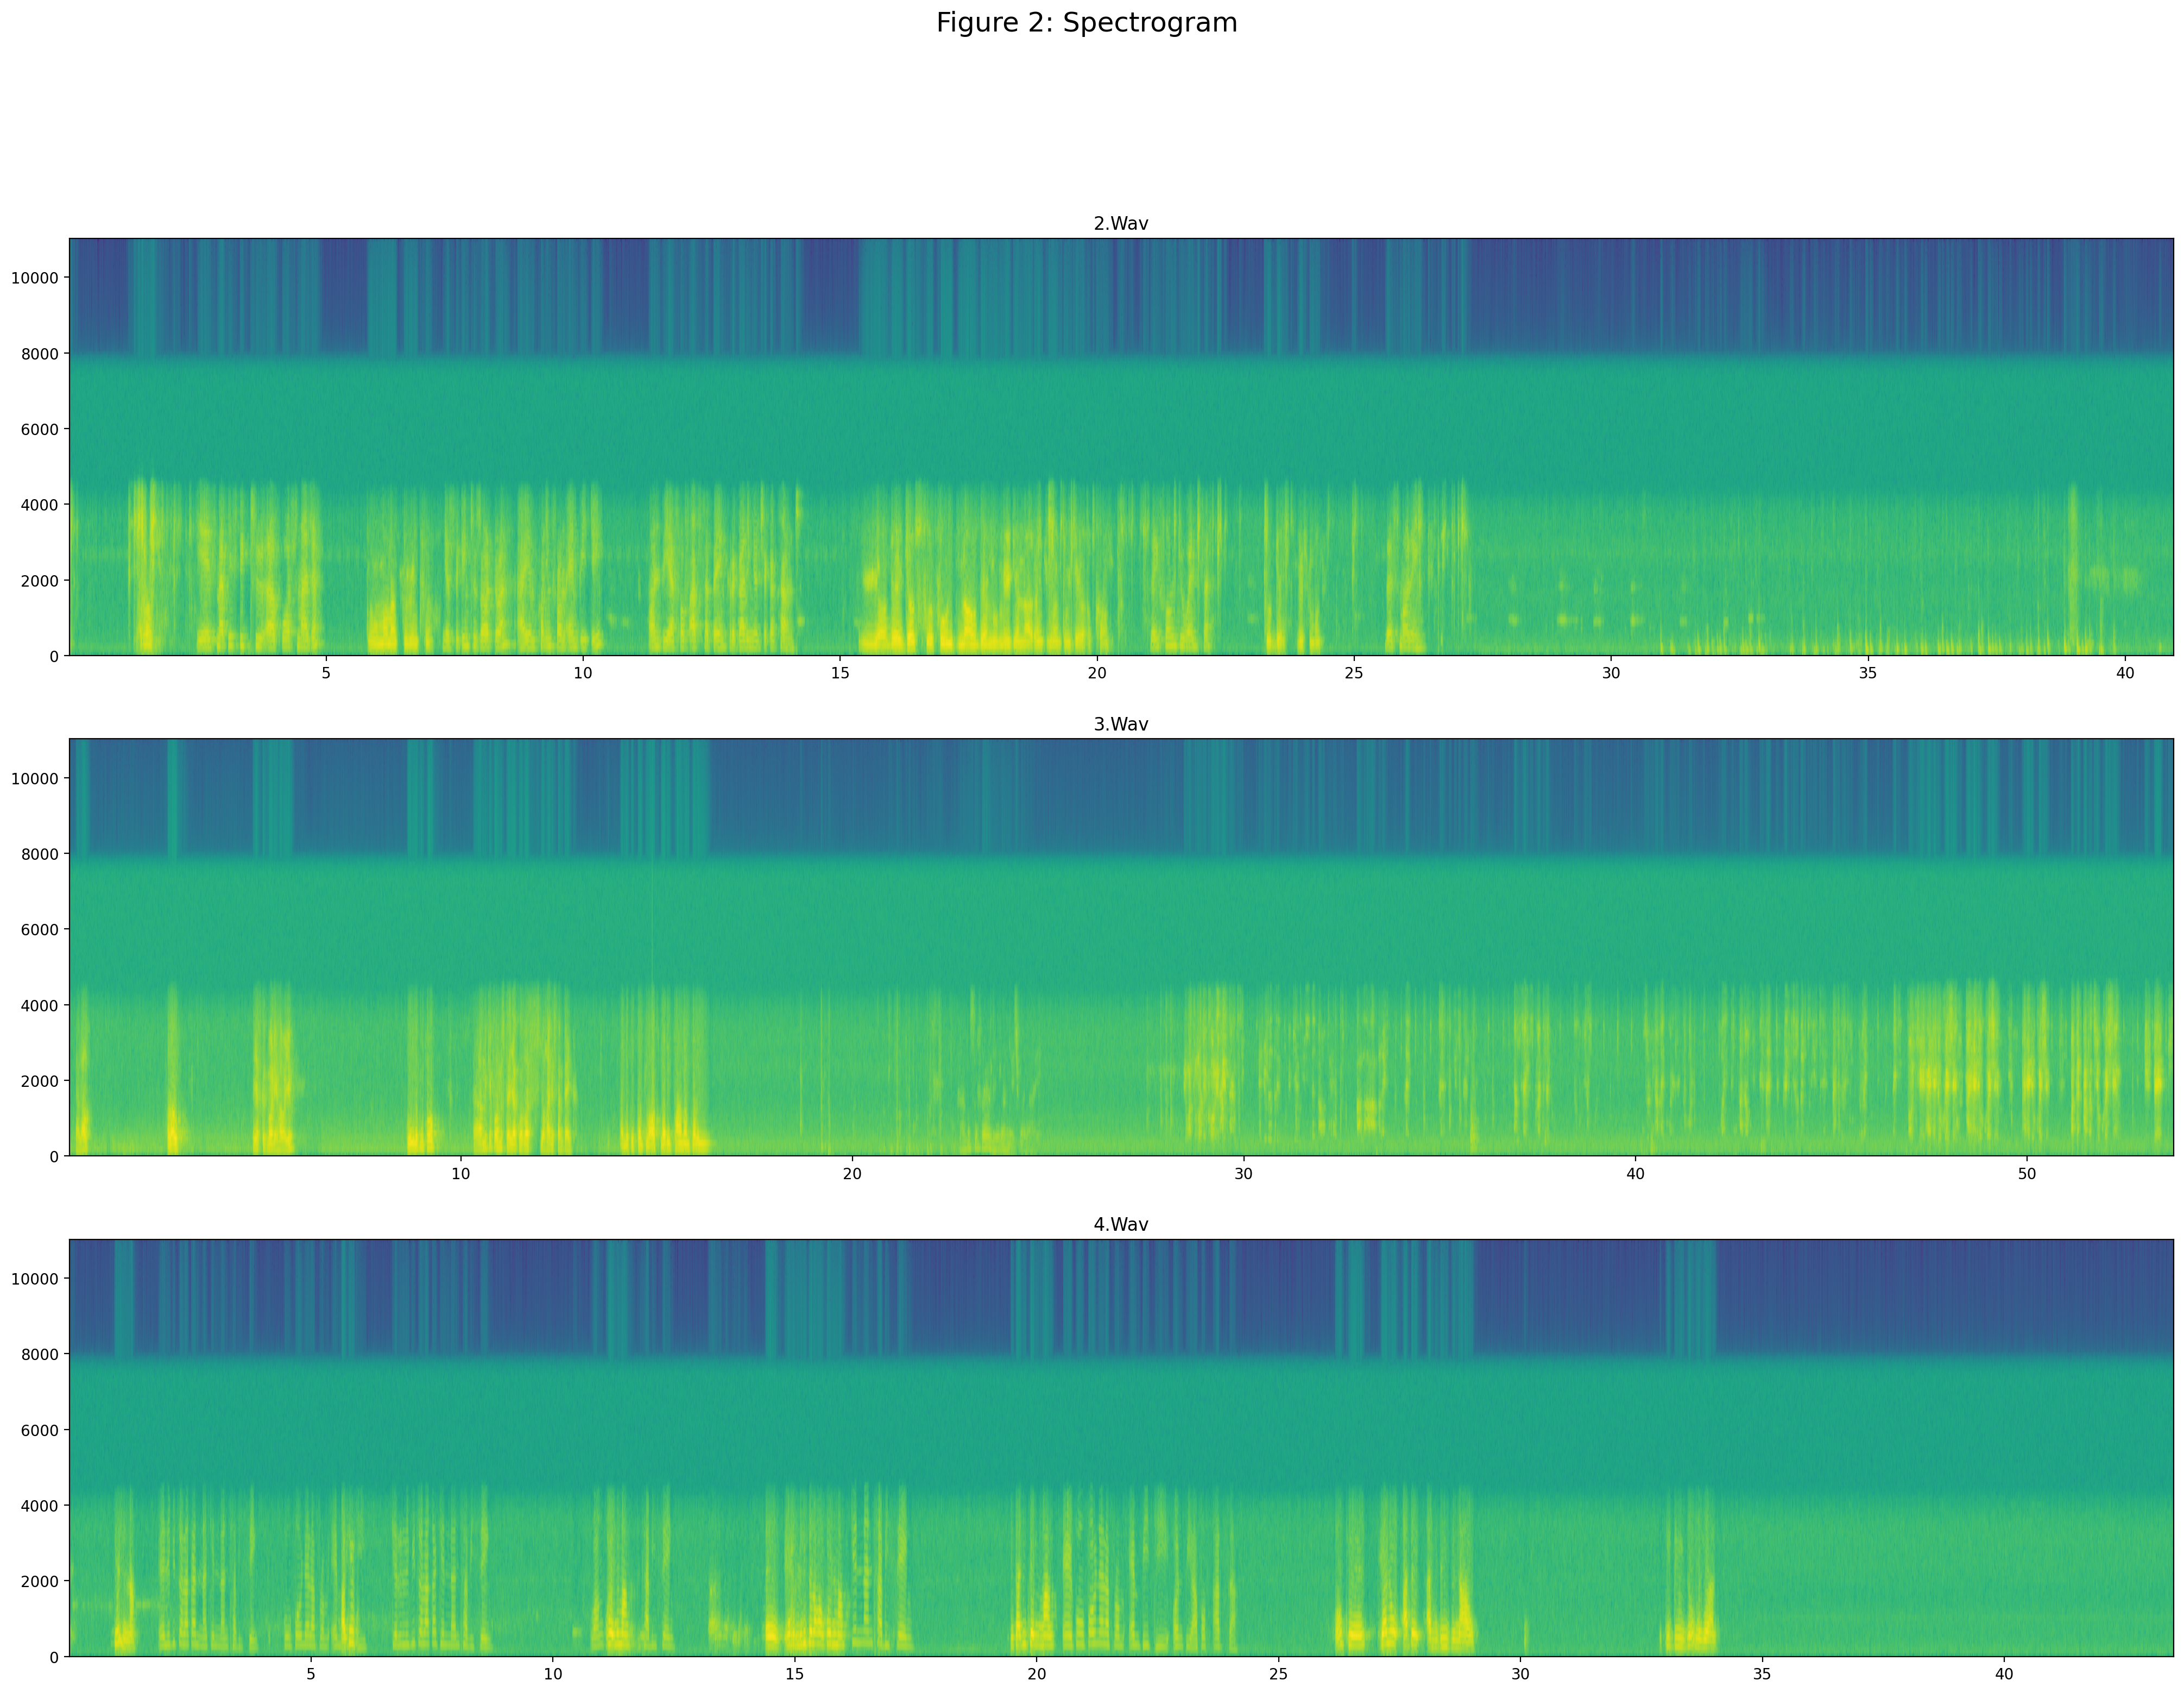

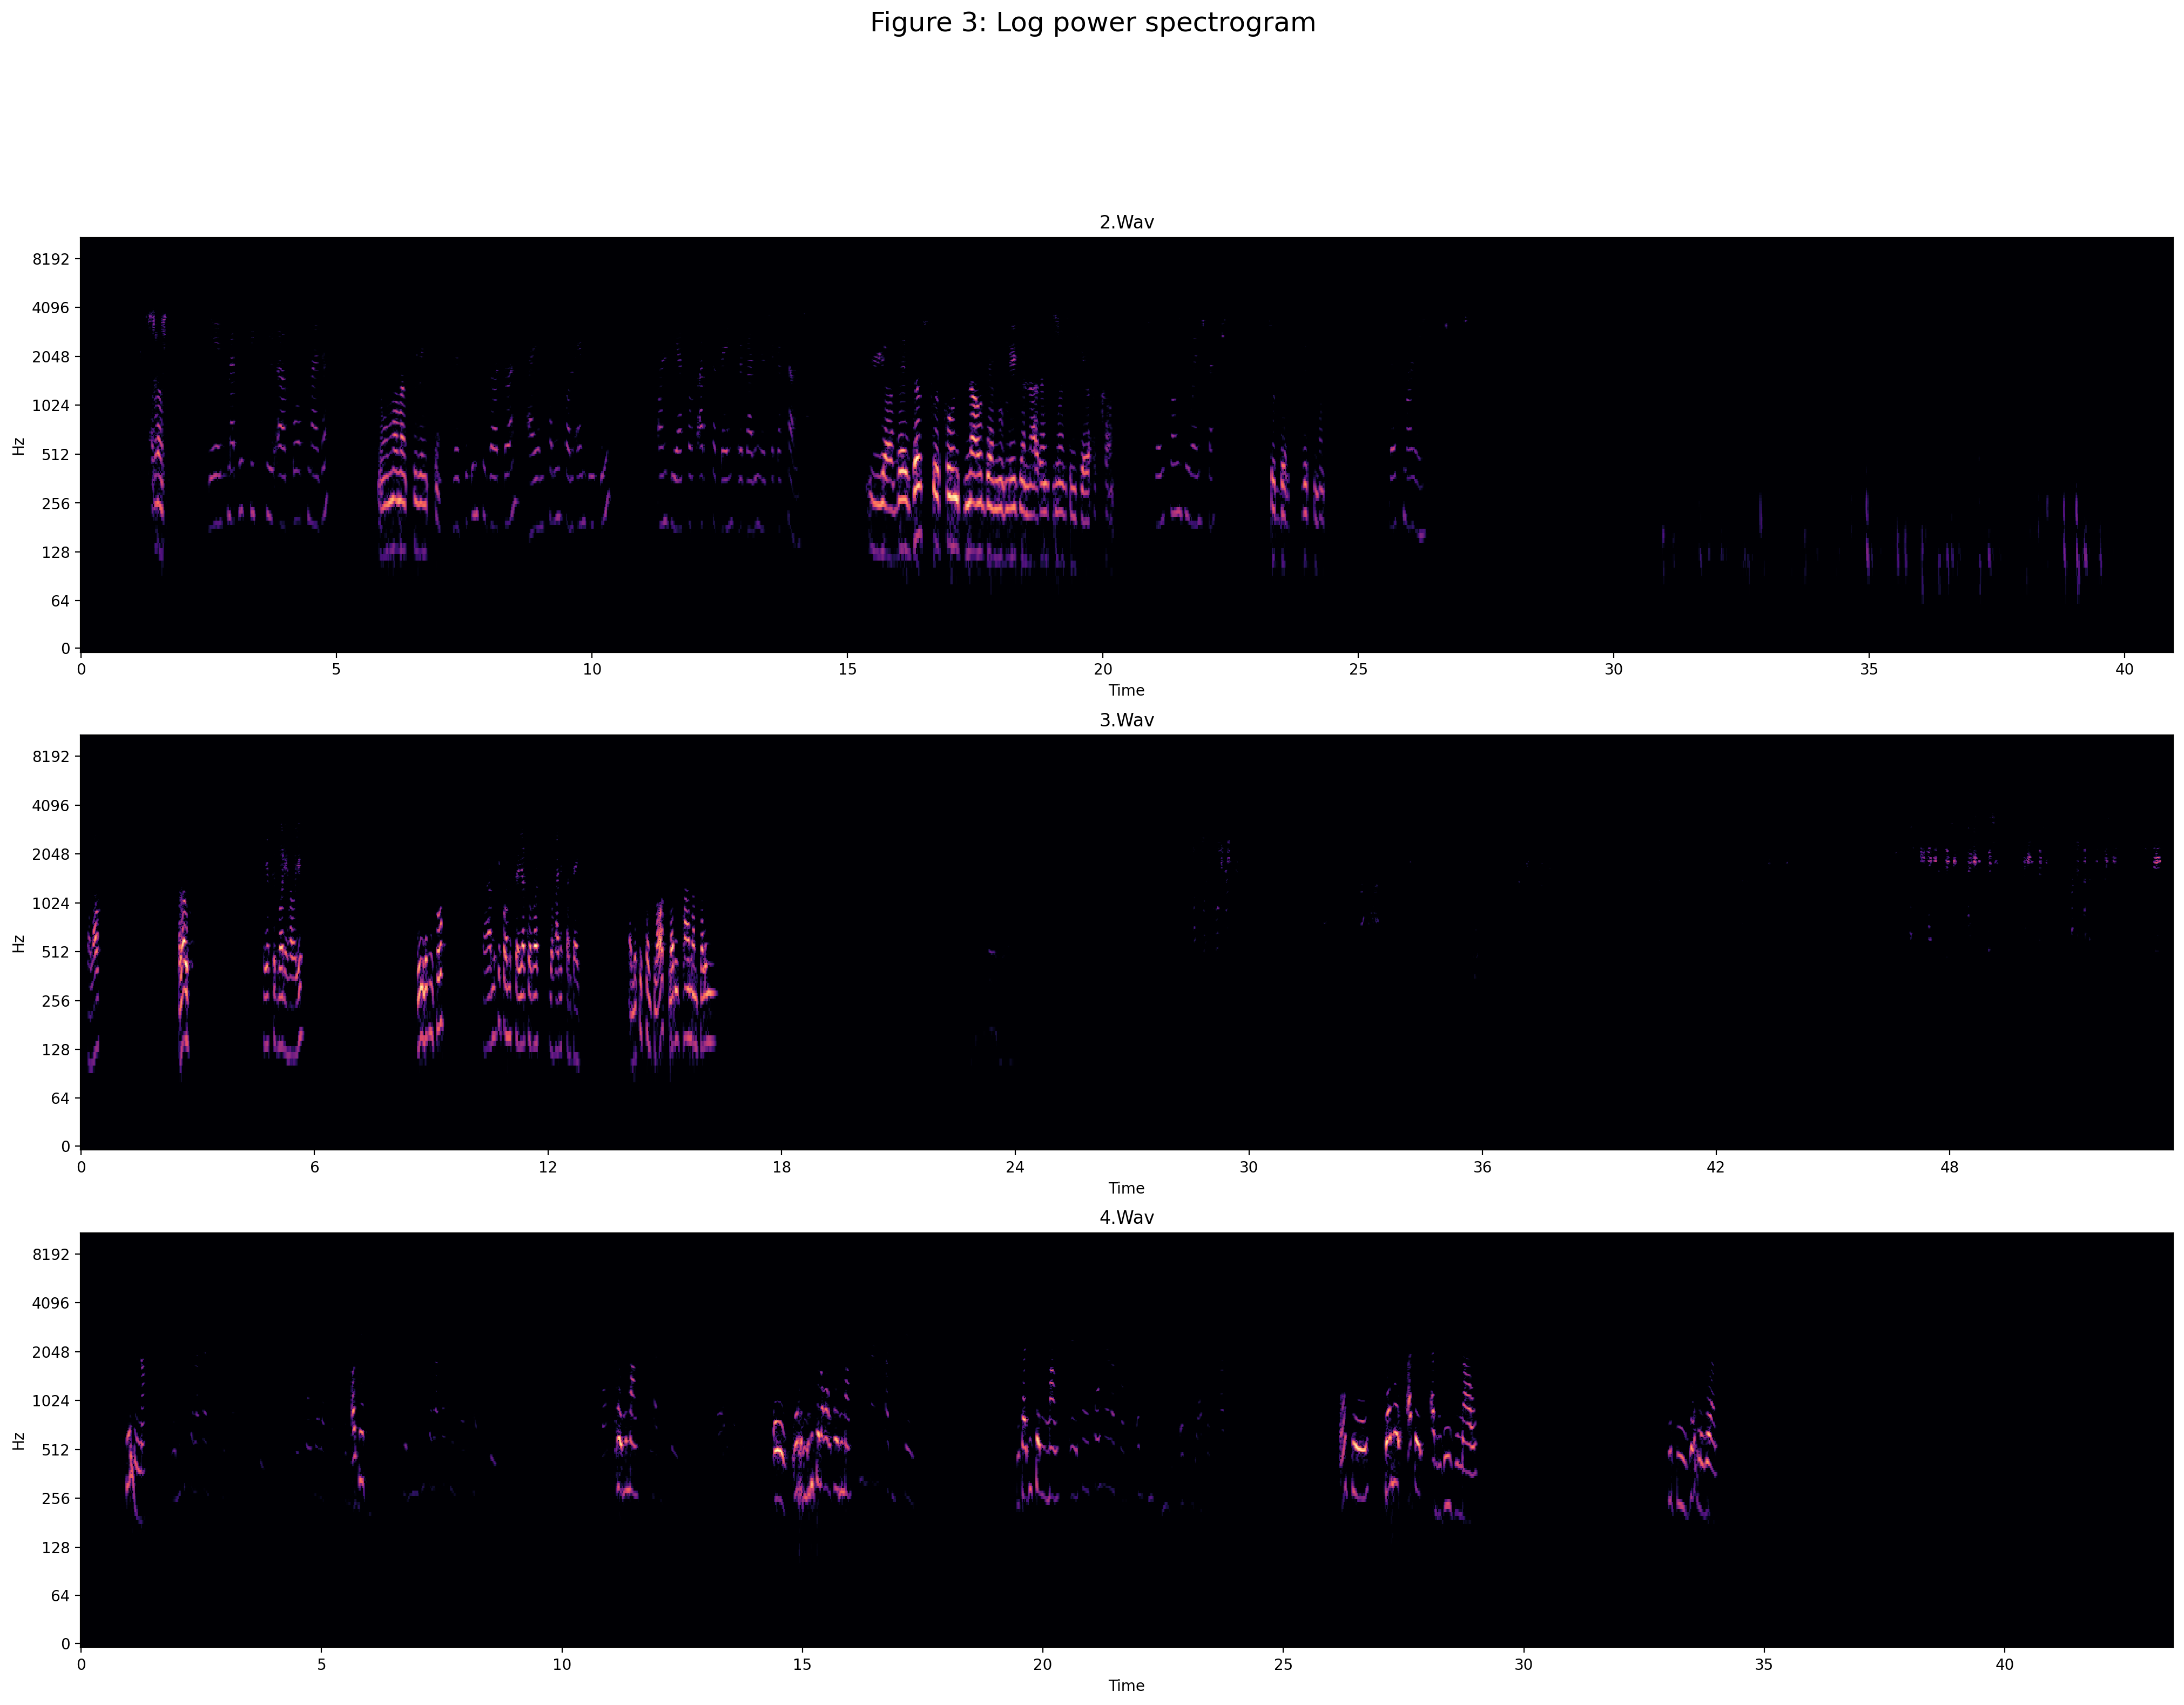

In [93]:
def sound_eye(file_paths=FILE_PATHS,names=NAMES, save_location=SAVE_PATH):
    
    """
    Visual analysis of folder of sounds files
    Adapted from https://stackoverflow.com/questions/43533023/librosa-display-waveplotnp-arrayf-sr-22050-attributeerror-module-obje
    
    ***Args:
    - file_paths: list of file paths
    - sound_names: list of sound names
    - save_location: where files will be saved
    
    ***Returns:
    following files saved @ save_location
    - waves.png
    - specgram.png
    - log_power_specgram.png
    """

    def load_sound_files(file_paths):
        raw_sounds = []
        for fp in file_paths:
            X,sr = librosa.load(fp)
            raw_sounds.append(X)
        return raw_sounds

    def plot_waves(sound_names,file_paths):
        i = 1
        #fig = plt.figure(figsize=(25,60), dpi = 900)
        fig = plt.figure(figsize=(25,60))
        for n,f in zip(sound_names,raw_sounds):
            plt.subplot(10,1,i)
            librosa.display.waveshow(np.array(f),sr=22050)
            plt.title(n.title())
            i += 1
        plt.suptitle("Figure 1: Waveplot",x=0.5, y=0.915,fontsize=18)
        #plt.show()
        plt.savefig('preso_waves.png', dpi=DPI)

    def plot_specgram(sound_names,raw_sounds):
        i = 1
     
        fig = plt.figure(figsize=(25,60), dpi=DPI)
        for n,f in zip(sound_names,raw_sounds):
            plt.subplot(10,1,i)
            specgram(np.array(f), Fs=22050)
            plt.title(n.title())
            i += 1
        plt.suptitle("Figure 2: Spectrogram",x=0.5, y=0.915,fontsize=18)
        #plt.show()
        plt.savefig('preso_specgram.png', dpi=900)

    def plot_log_power_specgram(sound_names,raw_sounds):
        fig = plt.figure(figsize=(25,60), dpi = DPI)
        i = 1
        for n,f in zip(sound_names,raw_sounds):
            plt.subplot(10,1,i)
            #D = librosa.logamplitude(np.abs(librosa.stft(f))**2, ref_power=np.max)
            D = librosa.core.amplitude_to_db(np.abs(librosa.stft(f))**2, ref=np.max)
            librosa.display.specshow(D,x_axis='time' ,y_axis='log')
            plt.title(n.title())
            i += 1
        plt.suptitle("Figure 3: Log power spectrogram",x=0.5, y=0.915,fontsize=18)
        #plt.show()
        plt.savefig('preso_log_power_specgram.png', dpi=DPI)

    # pulling it all together...
    print("###working###")
    
    start = dt.now()
    print("\n§§§ loading sound files...")
    raw_sounds = load_sound_files(file_paths)
    end = dt.now()
    print(f"time taken to load sound files {end - start}")
    
    start = dt.now()
    print("\n§§§ plotting wavelength...")
    plot_waves(names,raw_sounds)
    end = dt.now()
    print(f"time taken to plot wavelength {end - start}")
    
    start = dt.now()
    print("\n§§§ plotting spectrogram...")
    plot_specgram(names,raw_sounds)
    end = dt.now()
    print(f"§ time taken to plot spectrogram {end - start}")
    
    start = dt.now()
    print("\n§§§ plotting log_power_spectrogram...")
    plot_log_power_specgram(names,raw_sounds)
    end = dt.now()
    print(f"§ time taken to plot log_power_spectrogram {end - start}")
    ###~
    
sound_eye()


After submitting your POST request, you will get a response that includes an id key and a status key.

[getting transcription results](https://docs.assemblyai.com/walkthroughs#getting-the-transcription-result)

After you submit an audio file for processing, the `"status"` key will go from `"queued"` to `"processing"` to `"completed"`. You can make a `GET` request, as shown on the right, to check for updates on the status of your transcription.

You'll have to make repeated GET requests until the status is `"completed"` or `"error"`. Once the status key is shown as "completed", you'll see the text, words,


## Using API with `requests`

[Functions largely from this blog](https://towardsdatascience.com/how-to-build-a-web-app-to-transcribe-audio-using-python-and-assemblyai-18f197253fd8)

The AssemblyAI model expects the file to be accessible via a URL. Therefore, we will need to upload the audio file to blob storage to make it accessible via a URL. Fortunately, AssemblyAI provides a quick and easy way to do this.

We need to make a `POST request` to the following AssemblyAI API endpoint: `https://api.assemblyai.com/v2/upload`

The response will contain a temporary URL to the file, we can pass this URL to the back to the AssemblyAI `transcript` API endpoint. The URL is a private URL accessible only to the AssemblyAI servers. All the uploads are immediately deleted after transcription and never stored.

We will use Python’s request library that we installed earlier to make the `POST request`

In [26]:
def get_url(token, data):
    """
    Helper Function 1: Uploading a local audio file to AssemblyAI
    Adapted from: https://towardsdatascience.com/how-to-build-a-web-app-to-transcribe-audio-using-python-and-assemblyai-18f197253fd8
    
    -Args:
    - token: The API key
    - data : The File Object to upload
    
    ***Returns:
    url : url to uploaded file
    """
    
    def read_file(filename, chunk_size=5242880):
        """
        Helper function to read file onto server
        """
        with open(filename, 'rb') as _file:
            while True:
                data = _file.read(chunk_size)
                if not data:
                    break
                yield data

    
    headers = {"authorization": token}
    response = requests.post("https://api.assemblyai.com/v2/upload", headers=headers, data=read_file(data))
    url = response.json()["upload_url"]
    print("Uploaded File and got temporary URL to file")
     
    return url

# getting temporary url
URL = get_url(TOKEN, file)
URL

Uploaded File and got temporary URL to file


'https://cdn.assemblyai.com/upload/8aceb351-e1e6-4c42-9151-2a82e59e9326'

In [43]:
FILE_PATHS

['/Users/neelanpather/dev/amr2wav/1/converted/2.wav',
 '/Users/neelanpather/dev/amr2wav/1/converted/3.wav',
 '/Users/neelanpather/dev/amr2wav/1/converted/4.wav']

In [56]:
STATUS

['ogds8s6koy-264a-49f4-8253-801f1d6a345c',
 'ogds81zk4l-6856-47f6-b0d3-96b0cdd0ed39',
 'ogds8yjouc-52c5-418c-b6de-e3d59b39b3dc']


Now that we have a function to get a URL for our audio file, we will use this URL and make a request to the endpoint which will actually transcribe the file. 

We  make a request to the Transcription Endpoint along with the URL to the file. We need to make a request to the following AssemblyAI API endpoint


In [27]:
def get_transcribe_id(token, url):
    """
    Helper Function 2: Uploading a file for transcription
    Adapted from: https://towardsdatascience.com/how-to-build-a-web-app-to-transcribe-audio-using-python-and-assemblyai-18f197253fd8
    
    
    ***Args:
    - token: The API key
    - url : Url to uploaded file
    
    ***Returna:
    - id : file transcribe id
    """
    endpoint = "https://api.assemblyai.com/v2/transcript"
    json = {
    "audio_url": url
    }
    headers = {
    "authorization": token,
    "content-type": "application/json"
    }
    response = requests.post(endpoint, json=json, headers=headers)
    id_ = response.json()["id"]
    print("Made request and file is currently queued")
    
    return id_

ID = get_transcribe_id(TOKEN, URL)
ID

Made request and file is currently queued


'ogdznydlhg-8499-4b56-81ca-13a8743ced1c'

Once we have the transcription ID of our audio file, we can make a `GET request` to the following AssemblyAI API endpoint to check the status of the transcription:

In [30]:
def get_status(token, transcribe_id):
    """
    Helper Function 3: Get transcription status
    Adapted from: https://towardsdatascience.com/how-to-build-a-web-app-to-transcribe-audio-using-python-and-assemblyai-18f197253fd8
    

    ***Args:
    - token: The API key
    - transcribe_id: The ID of the file which is being

    ***Returns:
    result : The response object
    """ 
    endpoint= f"https://api.assemblyai.com/v2/transcript/{transcribe_id}"
    headers = {
    "authorization": token
               }
    result = requests.get(endpoint, headers=headers).json()
     
    return result

STATUS = get_status(TOKEN, ID)
STATUS['text']

'Hello? Yes, may I please speak to you? Speaking to Zodran. I am calling from Mbd on behalf of Apps Bank regarding your check account. Now then we make an arrangement with the account. They phoned you when, sir? Today? This month? This morning.'

### creating bulk loops

In [58]:
def bulk_uploader(token: str, file_paths: str):
    """
    Helper function to upload all files in folder to Assembly AI server
    """
    urls = []
    for f in file_paths:
        
        if f.endswith('.wav') is not True:
            print(f"{f} not .wav")
            break
        else:
            urls.append(get_url(token,f))
    print("files uploaded to following urls")        
    return urls
            
            
URLS = bulk_uploader(TOKEN, FILE_PATHS)
URLS
    

Uploaded File and got temporary URL to file
Uploaded File and got temporary URL to file
Uploaded File and got temporary URL to file
files uploaded to following urls


['https://cdn.assemblyai.com/upload/ddeaa049-173d-4040-a7b7-17b5ef96a213',
 'https://cdn.assemblyai.com/upload/ce2404ff-5f0b-4f49-a670-5a0f8edf2d76',
 'https://cdn.assemblyai.com/upload/132b6a16-82b6-418f-9931-f9f61ff0faa2']

In [59]:
def bulk_get_ids(token: str, urls: list):
    ids = []
    for url in urls:
        ids.append(get_transcribe_id(token, url))
    return ids

IDS = bulk_get_ids(TOKEN, URLS)
IDS

Made request and file is currently queued
Made request and file is currently queued
Made request and file is currently queued


['ogdsueackf-ce50-40d9-827f-545cf4d37d28',
 'ogdsuolp5a-350b-456d-9708-0cad0dd46cc6',
 'ogdsu6oiot-a73a-43ce-87ea-bc809a32b2f2']

In [64]:
def bulk_get_status(token: str, ids: list):
    status = []
    for id in ids:
        status.append(get_status(token, id))
    return status

STATUS = bulk_get_status(TOKEN, IDS)
STATUS

[{'id': 'ogdsueackf-ce50-40d9-827f-545cf4d37d28',
  'language_model': 'assemblyai_default',
  'acoustic_model': 'assemblyai_default',
  'language_code': 'en_us',
  'status': 'completed',
  'audio_url': 'https://cdn.assemblyai.com/upload/ddeaa049-173d-4040-a7b7-17b5ef96a213',
  'text': 'Hello? Yes, may I please speak to you? Speaking to Zodran. I am calling from Mbd on behalf of Apps Bank regarding your check account. Now then we make an arrangement with the account. They phoned you when, sir? Today? This month? This morning.',
  'words': [{'text': 'Hello?',
    'start': 1450,
    'end': 2000,
    'confidence': 0.51845,
    'speaker': None},
   {'text': 'Yes,',
    'start': 2390,
    'end': 2826,
    'confidence': 0.94939,
    'speaker': None},
   {'text': 'may',
    'start': 2888,
    'end': 3006,
    'confidence': 0.9223,
    'speaker': None},
   {'text': 'I',
    'start': 3008,
    'end': 3102,
    'confidence': 0.61723,
    'speaker': None},
   {'text': 'please',
    'start': 3116,


In [61]:
get_status(TOKEN, IDS[0])

{'id': 'ogdsueackf-ce50-40d9-827f-545cf4d37d28',
 'language_model': 'assemblyai_default',
 'acoustic_model': 'assemblyai_default',
 'language_code': 'en_us',
 'status': 'completed',
 'audio_url': 'https://cdn.assemblyai.com/upload/ddeaa049-173d-4040-a7b7-17b5ef96a213',
 'text': 'Hello? Yes, may I please speak to you? Speaking to Zodran. I am calling from Mbd on behalf of Apps Bank regarding your check account. Now then we make an arrangement with the account. They phoned you when, sir? Today? This month? This morning.',
 'words': [{'text': 'Hello?',
   'start': 1450,
   'end': 2000,
   'confidence': 0.51845,
   'speaker': None},
  {'text': 'Yes,',
   'start': 2390,
   'end': 2826,
   'confidence': 0.94939,
   'speaker': None},
  {'text': 'may',
   'start': 2888,
   'end': 3006,
   'confidence': 0.9223,
   'speaker': None},
  {'text': 'I',
   'start': 3008,
   'end': 3102,
   'confidence': 0.61723,
   'speaker': None},
  {'text': 'please',
   'start': 3116,
   'end': 3258,
   'confidenc

### Understanding Assembly AI API

The status of transcription changes from “queued” to “processing” to “completed” as long as no errors are encountered.

We will need to poll this endpoint until we get a response object with the status “completed”.

We can make use of a while loop to continuously make requests to the endpoint. During each iteration of the loop, we will check the status of the transcription. The loop will keep on running till the status is “completed”. This process of making requests and waiting till the status is complete is known as polling

In [ ]:
while get_status(TOKEN, ID)['status'] != 'completed':
    transcript = get_status(TOKEN, ID)

text = transcript.text

## From UI for preso

In [100]:
response_2 = {
    "id": "oguo67wzdy-5b57-423c-a408-da041dd7b94a",
    "language_model": "assemblyai_default",
    "acoustic_model": "assemblyai_default",
    "language_code": "en_us",
    "status": "completed",
    "audio_url": "https://cdn.assemblyai.com/upload/92c3bed3-28b7-41cf-85e9-1f2f869c572b",
    "text": "Hello? Yes, may I please speak to you? Speaking to Zodran. I am calling from Mbd on behalf of Apps Bank regarding your check account. Now then we make an arrangement with the account. They phoned you when, sir? Today? This month? This morning.",
    "words": [
        {
            "text": "Hello?",
            "start": 1450,
            "end": 2000,
            "confidence": 0.51845,
            "speaker": "B"
        },
        {
            "text": "Yes,",
            "start": 2390,
            "end": 2826,
            "confidence": 0.94939,
            "speaker": "A"
        },
        {
            "text": "may",
            "start": 2888,
            "end": 3006,
            "confidence": 0.9223,
            "speaker": "A"
        },
        {
            "text": "I",
            "start": 3008,
            "end": 3102,
            "confidence": 0.61723,
            "speaker": "A"
        },
        {
            "text": "please",
            "start": 3116,
            "end": 3258,
            "confidence": 0.97954,
            "speaker": "A"
        },
        {
            "text": "speak",
            "start": 3284,
            "end": 3510,
            "confidence": 0.98073,
            "speaker": "A"
        },
        {
            "text": "to",
            "start": 3560,
            "end": 4160,
            "confidence": 0.98302,
            "speaker": "A"
        },
        {
            "text": "you?",
            "start": 7170,
            "end": 7498,
            "confidence": 0.58538,
            "speaker": "A"
        },
        {
            "text": "Speaking",
            "start": 7524,
            "end": 7750,
            "confidence": 0.86151,
            "speaker": "A"
        },
        {
            "text": "to",
            "start": 7800,
            "end": 7978,
            "confidence": 0.99131,
            "speaker": "A"
        },
        {
            "text": "Zodran.",
            "start": 8004,
            "end": 8690,
            "confidence": 0.10469,
            "speaker": "A"
        },
        {
            "text": "I",
            "start": 8750,
            "end": 8938,
            "confidence": 0.99238,
            "speaker": "A"
        },
        {
            "text": "am",
            "start": 8964,
            "end": 9154,
            "confidence": 0.93799,
            "speaker": "A"
        },
        {
            "text": "calling",
            "start": 9192,
            "end": 9430,
            "confidence": 0.99357,
            "speaker": "A"
        },
        {
            "text": "from",
            "start": 9480,
            "end": 9730,
            "confidence": 0.99824,
            "speaker": "A"
        },
        {
            "text": "Mbd",
            "start": 9780,
            "end": 10630,
            "confidence": 0.71353,
            "speaker": "A"
        },
        {
            "text": "on",
            "start": 11190,
            "end": 11518,
            "confidence": 0.99191,
            "speaker": "A"
        },
        {
            "text": "behalf",
            "start": 11544,
            "end": 11894,
            "confidence": 0.89444,
            "speaker": "A"
        },
        {
            "text": "of",
            "start": 11942,
            "end": 12118,
            "confidence": 0.99216,
            "speaker": "A"
        },
        {
            "text": "Apps",
            "start": 12144,
            "end": 12494,
            "confidence": 0.60023,
            "speaker": "A"
        },
        {
            "text": "Bank",
            "start": 12542,
            "end": 12854,
            "confidence": 0.92676,
            "speaker": "A"
        },
        {
            "text": "regarding",
            "start": 12902,
            "end": 13298,
            "confidence": 0.54174,
            "speaker": "A"
        },
        {
            "text": "your",
            "start": 13334,
            "end": 13498,
            "confidence": 0.9553,
            "speaker": "A"
        },
        {
            "text": "check",
            "start": 13524,
            "end": 13714,
            "confidence": 0.98118,
            "speaker": "A"
        },
        {
            "text": "account.",
            "start": 13752,
            "end": 14340,
            "confidence": 0.99443,
            "speaker": "A"
        },
        {
            "text": "Now",
            "start": 17250,
            "end": 17650,
            "confidence": 0.62859,
            "speaker": "B"
        },
        {
            "text": "then",
            "start": 17700,
            "end": 17914,
            "confidence": 0.66254,
            "speaker": "B"
        },
        {
            "text": "we",
            "start": 17952,
            "end": 18154,
            "confidence": 0.58245,
            "speaker": "B"
        },
        {
            "text": "make",
            "start": 18192,
            "end": 18394,
            "confidence": 0.87884,
            "speaker": "B"
        },
        {
            "text": "an",
            "start": 18432,
            "end": 18634,
            "confidence": 0.65938,
            "speaker": "B"
        },
        {
            "text": "arrangement",
            "start": 18672,
            "end": 19286,
            "confidence": 0.28621,
            "speaker": "B"
        },
        {
            "text": "with",
            "start": 19358,
            "end": 19594,
            "confidence": 0.96966,
            "speaker": "B"
        },
        {
            "text": "the",
            "start": 19632,
            "end": 19870,
            "confidence": 0.56051,
            "speaker": "B"
        },
        {
            "text": "account.",
            "start": 19920,
            "end": 20520,
            "confidence": 0.99394,
            "speaker": "B"
        },
        {
            "text": "They",
            "start": 20910,
            "end": 21274,
            "confidence": 0.83362,
            "speaker": "A"
        },
        {
            "text": "phoned",
            "start": 21312,
            "end": 21602,
            "confidence": 0.64583,
            "speaker": "A"
        },
        {
            "text": "you",
            "start": 21626,
            "end": 21778,
            "confidence": 0.93106,
            "speaker": "A"
        },
        {
            "text": "when,",
            "start": 21804,
            "end": 21994,
            "confidence": 0.8339,
            "speaker": "A"
        },
        {
            "text": "sir?",
            "start": 22032,
            "end": 22620,
            "confidence": 0.84533,
            "speaker": "A"
        },
        {
            "text": "Today?",
            "start": 23130,
            "end": 23746,
            "confidence": 0.85714,
            "speaker": "B"
        },
        {
            "text": "This",
            "start": 23868,
            "end": 24154,
            "confidence": 0.63324,
            "speaker": "B"
        },
        {
            "text": "month?",
            "start": 24192,
            "end": 24780,
            "confidence": 0.90911,
            "speaker": "B"
        },
        {
            "text": "This",
            "start": 25530,
            "end": 25930,
            "confidence": 0.94327,
            "speaker": "A"
        },
        {
            "text": "morning.",
            "start": 25980,
            "end": 26080,
            "confidence": 0.99171,
            "speaker": "A"
        }
    ],
    "utterances": [
        {
            "confidence": 0.51845,
            "end": 2000,
            "speaker": "B",
            "start": 1450,
            "text": "Hello?",
            "words": [
                {
                    "text": "Hello?",
                    "start": 1450,
                    "end": 2000,
                    "confidence": 0.51845,
                    "speaker": "B"
                }
            ]
        },
        {
            "confidence": 0.8537066666666667,
            "end": 14340,
            "speaker": "A",
            "start": 2390,
            "text": "Yes, may I please speak to you? Speaking to Zodran. I am calling from Mbd on behalf of Apps Bank regarding your check account.",
            "words": [
                {
                    "text": "Yes,",
                    "start": 2390,
                    "end": 2826,
                    "confidence": 0.94939,
                    "speaker": "A"
                },
                {
                    "text": "may",
                    "start": 2888,
                    "end": 3006,
                    "confidence": 0.9223,
                    "speaker": "A"
                },
                {
                    "text": "I",
                    "start": 3008,
                    "end": 3102,
                    "confidence": 0.61723,
                    "speaker": "A"
                },
                {
                    "text": "please",
                    "start": 3116,
                    "end": 3258,
                    "confidence": 0.97954,
                    "speaker": "A"
                },
                {
                    "text": "speak",
                    "start": 3284,
                    "end": 3510,
                    "confidence": 0.98073,
                    "speaker": "A"
                },
                {
                    "text": "to",
                    "start": 3560,
                    "end": 4160,
                    "confidence": 0.98302,
                    "speaker": "A"
                },
                {
                    "text": "you?",
                    "start": 7170,
                    "end": 7498,
                    "confidence": 0.58538,
                    "speaker": "A"
                },
                {
                    "text": "Speaking",
                    "start": 7524,
                    "end": 7750,
                    "confidence": 0.86151,
                    "speaker": "A"
                },
                {
                    "text": "to",
                    "start": 7800,
                    "end": 7978,
                    "confidence": 0.99131,
                    "speaker": "A"
                },
                {
                    "text": "Zodran.",
                    "start": 8004,
                    "end": 8690,
                    "confidence": 0.10469,
                    "speaker": "A"
                },
                {
                    "text": "I",
                    "start": 8750,
                    "end": 8938,
                    "confidence": 0.99238,
                    "speaker": "A"
                },
                {
                    "text": "am",
                    "start": 8964,
                    "end": 9154,
                    "confidence": 0.93799,
                    "speaker": "A"
                },
                {
                    "text": "calling",
                    "start": 9192,
                    "end": 9430,
                    "confidence": 0.99357,
                    "speaker": "A"
                },
                {
                    "text": "from",
                    "start": 9480,
                    "end": 9730,
                    "confidence": 0.99824,
                    "speaker": "A"
                },
                {
                    "text": "Mbd",
                    "start": 9780,
                    "end": 10630,
                    "confidence": 0.71353,
                    "speaker": "A"
                },
                {
                    "text": "on",
                    "start": 11190,
                    "end": 11518,
                    "confidence": 0.99191,
                    "speaker": "A"
                },
                {
                    "text": "behalf",
                    "start": 11544,
                    "end": 11894,
                    "confidence": 0.89444,
                    "speaker": "A"
                },
                {
                    "text": "of",
                    "start": 11942,
                    "end": 12118,
                    "confidence": 0.99216,
                    "speaker": "A"
                },
                {
                    "text": "Apps",
                    "start": 12144,
                    "end": 12494,
                    "confidence": 0.60023,
                    "speaker": "A"
                },
                {
                    "text": "Bank",
                    "start": 12542,
                    "end": 12854,
                    "confidence": 0.92676,
                    "speaker": "A"
                },
                {
                    "text": "regarding",
                    "start": 12902,
                    "end": 13298,
                    "confidence": 0.54174,
                    "speaker": "A"
                },
                {
                    "text": "your",
                    "start": 13334,
                    "end": 13498,
                    "confidence": 0.9553,
                    "speaker": "A"
                },
                {
                    "text": "check",
                    "start": 13524,
                    "end": 13714,
                    "confidence": 0.98118,
                    "speaker": "A"
                },
                {
                    "text": "account.",
                    "start": 13752,
                    "end": 14340,
                    "confidence": 0.99443,
                    "speaker": "A"
                }
            ]
        },
        {
            "confidence": 0.6913466666666667,
            "end": 20520,
            "speaker": "B",
            "start": 17250,
            "text": "Now then we make an arrangement with the account.",
            "words": [
                {
                    "text": "Now",
                    "start": 17250,
                    "end": 17650,
                    "confidence": 0.62859,
                    "speaker": "B"
                },
                {
                    "text": "then",
                    "start": 17700,
                    "end": 17914,
                    "confidence": 0.66254,
                    "speaker": "B"
                },
                {
                    "text": "we",
                    "start": 17952,
                    "end": 18154,
                    "confidence": 0.58245,
                    "speaker": "B"
                },
                {
                    "text": "make",
                    "start": 18192,
                    "end": 18394,
                    "confidence": 0.87884,
                    "speaker": "B"
                },
                {
                    "text": "an",
                    "start": 18432,
                    "end": 18634,
                    "confidence": 0.65938,
                    "speaker": "B"
                },
                {
                    "text": "arrangement",
                    "start": 18672,
                    "end": 19286,
                    "confidence": 0.28621,
                    "speaker": "B"
                },
                {
                    "text": "with",
                    "start": 19358,
                    "end": 19594,
                    "confidence": 0.96966,
                    "speaker": "B"
                },
                {
                    "text": "the",
                    "start": 19632,
                    "end": 19870,
                    "confidence": 0.56051,
                    "speaker": "B"
                },
                {
                    "text": "account.",
                    "start": 19920,
                    "end": 20520,
                    "confidence": 0.99394,
                    "speaker": "B"
                }
            ]
        },
        {
            "confidence": 0.817948,
            "end": 22620,
            "speaker": "A",
            "start": 20910,
            "text": "They phoned you when, sir?",
            "words": [
                {
                    "text": "They",
                    "start": 20910,
                    "end": 21274,
                    "confidence": 0.83362,
                    "speaker": "A"
                },
                {
                    "text": "phoned",
                    "start": 21312,
                    "end": 21602,
                    "confidence": 0.64583,
                    "speaker": "A"
                },
                {
                    "text": "you",
                    "start": 21626,
                    "end": 21778,
                    "confidence": 0.93106,
                    "speaker": "A"
                },
                {
                    "text": "when,",
                    "start": 21804,
                    "end": 21994,
                    "confidence": 0.8339,
                    "speaker": "A"
                },
                {
                    "text": "sir?",
                    "start": 22032,
                    "end": 22620,
                    "confidence": 0.84533,
                    "speaker": "A"
                }
            ]
        },
        {
            "confidence": 0.79983,
            "end": 24780,
            "speaker": "B",
            "start": 23130,
            "text": "Today? This month?",
            "words": [
                {
                    "text": "Today?",
                    "start": 23130,
                    "end": 23746,
                    "confidence": 0.85714,
                    "speaker": "B"
                },
                {
                    "text": "This",
                    "start": 23868,
                    "end": 24154,
                    "confidence": 0.63324,
                    "speaker": "B"
                },
                {
                    "text": "month?",
                    "start": 24192,
                    "end": 24780,
                    "confidence": 0.90911,
                    "speaker": "B"
                }
            ]
        },
        {
            "confidence": 0.96749,
            "end": 26080,
            "speaker": "A",
            "start": 25530,
            "text": "This morning.",
            "words": [
                {
                    "text": "This",
                    "start": 25530,
                    "end": 25930,
                    "confidence": 0.94327,
                    "speaker": "A"
                },
                {
                    "text": "morning.",
                    "start": 25980,
                    "end": 26080,
                    "confidence": 0.99171,
                    "speaker": "A"
                }
            ]
        }
    ],
    "confidence": 0.810312272727273,
    "audio_duration": 41,
    "punctuate": True,
    "format_text": None,
    "dual_channel": None,
    "webhook_url": None,
    "webhook_status_code": None,
    "speed_boost": False,
    "auto_highlights_result": {
        "status": "success",
        "results": [
            {
                "count": 1,
                "rank": 0.18,
                "text": "Apps Bank",
                "timestamps": [
                    {
                        "start": 12144,
                        "end": 12854
                    }
                ]
            },
            {
                "count": 1,
                "rank": 0.14,
                "text": "behalf",
                "timestamps": [
                    {
                        "start": 11544,
                        "end": 11894
                    }
                ]
            },
            {
                "count": 1,
                "rank": 0.12,
                "text": "Mbd",
                "timestamps": [
                    {
                        "start": 9780,
                        "end": 10630
                    }
                ]
            },
            {
                "count": 1,
                "rank": 0.11,
                "text": "Zodran",
                "timestamps": [
                    {
                        "start": 8004,
                        "end": 8690
                    }
                ]
            },
            {
                "count": 1,
                "rank": 0.1,
                "text": "check account",
                "timestamps": [
                    {
                        "start": 13524,
                        "end": 14340
                    }
                ]
            },
            {
                "count": 2,
                "rank": 0.07,
                "text": "account",
                "timestamps": [
                    {
                        "start": 13752,
                        "end": 14340
                    },
                    {
                        "start": 19920,
                        "end": 20520
                    }
                ]
            },
            {
                "count": 1,
                "rank": 0.07,
                "text": "arrangement",
                "timestamps": [
                    {
                        "start": 18672,
                        "end": 19286
                    }
                ]
            },
            {
                "count": 1,
                "rank": 0.05,
                "text": "Today",
                "timestamps": [
                    {
                        "start": 23130,
                        "end": 23746
                    }
                ]
            },
            {
                "count": 1,
                "rank": 0.03,
                "text": "month",
                "timestamps": [
                    {
                        "start": 24192,
                        "end": 24780
                    }
                ]
            },
            {
                "count": 1,
                "rank": 0.03,
                "text": "morning",
                "timestamps": [
                    {
                        "start": 25980,
                        "end": 26080
                    }
                ]
            }
        ]
    },
    "auto_highlights": True,
    "audio_start_from": None,
    "audio_end_at": None,
    "word_boost": [],
    "boost_param": None,
    "filter_profanity": False,
    "redact_pii": False,
    "redact_pii_audio": False,
    "redact_pii_audio_quality": None,
    "redact_pii_policies": None,
    "redact_pii_sub": None,
    "speaker_labels": True,
    "content_safety": False,
    "iab_categories": False,
    "content_safety_labels": {
        "status": "unavailable",
        "results": [],
        "summary": {}
    },
    "iab_categories_result": {
        "status": "success",
        "results": [
            {
                "text": "Hello? Yes, may I please speak to you? Speaking to Zodran. I am calling from Mbd on behalf of Apps Bank regarding your check account. Now then we make an arrangement with the account. They phoned you when, sir? Today? This month? This morning.",
                "labels": [
                    {
                        "relevance": 0.35396048426628113,
                        "label": "PersonalFinance>ConsumerBanking"
                    },
                    {
                        "relevance": 0.1311246156692505,
                        "label": "BusinessAndFinance>Business>BusinessBanking&Finance"
                    },
                    {
                        "relevance": 0.09913452714681625,
                        "label": "PersonalFinance>PersonalDebt>CreditCards"
                    },
                    {
                        "relevance": 0.0012382493587210774,
                        "label": "PersonalFinance>HomeUtilities>PhoneServices"
                    },
                    {
                        "relevance": 0.0004551831225398928,
                        "label": "Shopping>GiftsAndGreetingsCards"
                    },
                    {
                        "relevance": 0.0004252480575814843,
                        "label": "BusinessAndFinance>Economy>InterestRates"
                    },
                    {
                        "relevance": 0.00041072070598602295,
                        "label": "BusinessAndFinance>Economy>FinancialRegulation"
                    },
                    {
                        "relevance": 0.00027005141600966454,
                        "label": "BusinessAndFinance>Business>BusinessBanking&Finance>DebtFactoring&InvoiceDiscounting"
                    },
                    {
                        "relevance": 0.00019764147873502225,
                        "label": "Automotive>AutoTechnology>AutoNavigationSystems"
                    },
                    {
                        "relevance": 0.00019003658962901682,
                        "label": "BusinessAndFinance>Industries>TelecommunicationsIndustry"
                    }
                ],
                "timestamp": {
                    "start": 1450,
                    "end": 26080
                }
            }
        ],
        "summary": {
            "PersonalFinance>ConsumerBanking": 1,
            "BusinessAndFinance>Business>BusinessBanking&Finance": 0.37044987082481384,
            "PersonalFinance>PersonalDebt>CreditCards": 0.28007230162620544,
            "PersonalFinance>HomeUtilities>PhoneServices": 0.0034982699435204268,
            "Shopping>GiftsAndGreetingsCards": 0.0012859716080129147,
            "BusinessAndFinance>Economy>InterestRates": 0.0012013998348265886,
            "BusinessAndFinance>Economy>FinancialRegulation": 0.001160357496701181,
            "BusinessAndFinance>Business>BusinessBanking&Finance>DebtFactoring&InvoiceDiscounting": 0.0007629422470927238,
            "Automotive>AutoTechnology>AutoNavigationSystems": 0.0005583715974353254,
            "BusinessAndFinance>Industries>TelecommunicationsIndustry": 0.0005368864513002336,
            "BusinessAndFinance>Industries>FinancialIndustry": 0.0005357773043215275,
            "BusinessAndFinance>Business>GovernmentBusiness": 0.0005302595091052353,
            "Religion&Spirituality>Islam": 0.00043102260679006577,
            "BusinessAndFinance>Economy>Currencies": 0.00041844634688459337,
            "BusinessAndFinance>Business>Sales": 0.0004157593648415059,
            "MusicAndAudio>TalkRadio>EducationalRadio": 0.0003672763705253601,
            "Technology&Computing>Computing>Internet>Email": 0.0003481235180515796,
            "Automotive>AutoBodyStyles>Sedan": 0.00033669357071630657,
            "BusinessAndFinance>Business>BusinessOperations": 0.0003094374551437795,
            "PersonalFinance>FinancialPlanning": 0.00028915327857248485
        }
    },
    "disfluencies": False,
    "sentiment_analysis": False,
    "auto_chapters": False,
    "chapters": None,
    "sentiment_analysis_results": None,
    "entity_detection": False,
    "entities": None
}

In [84]:
response_3 = {
    "id": "ogue9ciir6-0c6c-43ff-ae2f-a237a158222b",
    "language_model": "assemblyai_default",
    "acoustic_model": "assemblyai_default",
    "language_code": "en_us",
    "status": "completed",
    "audio_url": "https://cdn.assemblyai.com/upload/e793cac1-9713-4b2b-b000-b374a976e7ed",
    "text": "Hello? Hello. Yes, good morning. How are you? Who are you looking for? I'm looking for Mr Yakovas Johannes. Fantastic. To answer your question, if there's.",
    "words": [
        {
            "text": "Hello?",
            "start": 250,
            "end": 800,
            "confidence": 0.84915,
            "speaker": "A"
        },
        {
            "text": "Hello.",
            "start": 2330,
            "end": 3080,
            "confidence": 0.81734,
            "speaker": "A"
        },
        {
            "text": "Yes,",
            "start": 4550,
            "end": 4914,
            "confidence": 0.86515,
            "speaker": "A"
        },
        {
            "text": "good",
            "start": 4952,
            "end": 5082,
            "confidence": 0.99913,
            "speaker": "A"
        },
        {
            "text": "morning.",
            "start": 5096,
            "end": 5310,
            "confidence": 0.55811,
            "speaker": "A"
        },
        {
            "text": "How",
            "start": 5360,
            "end": 5502,
            "confidence": 0.99828,
            "speaker": "A"
        },
        {
            "text": "are",
            "start": 5516,
            "end": 5622,
            "confidence": 0.9366,
            "speaker": "A"
        },
        {
            "text": "you?",
            "start": 5636,
            "end": 6200,
            "confidence": 0.90237,
            "speaker": "A"
        },
        {
            "text": "Who",
            "start": 8450,
            "end": 8742,
            "confidence": 0.77532,
            "speaker": "A"
        },
        {
            "text": "are",
            "start": 8756,
            "end": 8826,
            "confidence": 0.63936,
            "speaker": "A"
        },
        {
            "text": "you",
            "start": 8828,
            "end": 8922,
            "confidence": 0.72247,
            "speaker": "A"
        },
        {
            "text": "looking",
            "start": 8936,
            "end": 9114,
            "confidence": 0.9896,
            "speaker": "A"
        },
        {
            "text": "for?",
            "start": 9152,
            "end": 9740,
            "confidence": 0.99332,
            "speaker": "A"
        },
        {
            "text": "I'm",
            "start": 10250,
            "end": 10582,
            "confidence": 0.45322,
            "speaker": "A"
        },
        {
            "text": "looking",
            "start": 10606,
            "end": 10794,
            "confidence": 0.98867,
            "speaker": "A"
        },
        {
            "text": "for",
            "start": 10832,
            "end": 10998,
            "confidence": 0.99278,
            "speaker": "A"
        },
        {
            "text": "Mr",
            "start": 11024,
            "end": 11250,
            "confidence": 0.87254,
            "speaker": "A"
        },
        {
            "text": "Yakovas",
            "start": 11300,
            "end": 11950,
            "confidence": 0.20914,
            "speaker": "A"
        },
        {
            "text": "Johannes.",
            "start": 12010,
            "end": 12478,
            "confidence": 0.31557,
            "speaker": "A"
        },
        {
            "text": "Fantastic.",
            "start": 12514,
            "end": 13350,
            "confidence": 0.02069,
            "speaker": "A"
        },
        {
            "text": "To",
            "start": 51150,
            "end": 51478,
            "confidence": 0.48182,
            "speaker": "B"
        },
        {
            "text": "answer",
            "start": 51504,
            "end": 51730,
            "confidence": 0.49978,
            "speaker": "B"
        },
        {
            "text": "your",
            "start": 51780,
            "end": 51958,
            "confidence": 0.84109,
            "speaker": "B"
        },
        {
            "text": "question,",
            "start": 51984,
            "end": 52560,
            "confidence": 0.72947,
            "speaker": "B"
        },
        {
            "text": "if",
            "start": 52890,
            "end": 53254,
            "confidence": 0.58431,
            "speaker": "B"
        },
        {
            "text": "there's.",
            "start": 53292,
            "end": 53450,
            "confidence": 0.40039,
            "speaker": "B"
        }
    ],
    "utterances": [
        {
            "confidence": 0.7449405,
            "end": 13350,
            "speaker": "A",
            "start": 250,
            "text": "Hello? Hello. Yes, good morning. How are you? Who are you looking for? I'm looking for Mr Yakovas Johannes. Fantastic.",
            "words": [
                {
                    "text": "Hello?",
                    "start": 250,
                    "end": 800,
                    "confidence": 0.84915,
                    "speaker": "A"
                },
                {
                    "text": "Hello.",
                    "start": 2330,
                    "end": 3080,
                    "confidence": 0.81734,
                    "speaker": "A"
                },
                {
                    "text": "Yes,",
                    "start": 4550,
                    "end": 4914,
                    "confidence": 0.86515,
                    "speaker": "A"
                },
                {
                    "text": "good",
                    "start": 4952,
                    "end": 5082,
                    "confidence": 0.99913,
                    "speaker": "A"
                },
                {
                    "text": "morning.",
                    "start": 5096,
                    "end": 5310,
                    "confidence": 0.55811,
                    "speaker": "A"
                },
                {
                    "text": "How",
                    "start": 5360,
                    "end": 5502,
                    "confidence": 0.99828,
                    "speaker": "A"
                },
                {
                    "text": "are",
                    "start": 5516,
                    "end": 5622,
                    "confidence": 0.9366,
                    "speaker": "A"
                },
                {
                    "text": "you?",
                    "start": 5636,
                    "end": 6200,
                    "confidence": 0.90237,
                    "speaker": "A"
                },
                {
                    "text": "Who",
                    "start": 8450,
                    "end": 8742,
                    "confidence": 0.77532,
                    "speaker": "A"
                },
                {
                    "text": "are",
                    "start": 8756,
                    "end": 8826,
                    "confidence": 0.63936,
                    "speaker": "A"
                },
                {
                    "text": "you",
                    "start": 8828,
                    "end": 8922,
                    "confidence": 0.72247,
                    "speaker": "A"
                },
                {
                    "text": "looking",
                    "start": 8936,
                    "end": 9114,
                    "confidence": 0.9896,
                    "speaker": "A"
                },
                {
                    "text": "for?",
                    "start": 9152,
                    "end": 9740,
                    "confidence": 0.99332,
                    "speaker": "A"
                },
                {
                    "text": "I'm",
                    "start": 10250,
                    "end": 10582,
                    "confidence": 0.45322,
                    "speaker": "A"
                },
                {
                    "text": "looking",
                    "start": 10606,
                    "end": 10794,
                    "confidence": 0.98867,
                    "speaker": "A"
                },
                {
                    "text": "for",
                    "start": 10832,
                    "end": 10998,
                    "confidence": 0.99278,
                    "speaker": "A"
                },
                {
                    "text": "Mr",
                    "start": 11024,
                    "end": 11250,
                    "confidence": 0.87254,
                    "speaker": "A"
                },
                {
                    "text": "Yakovas",
                    "start": 11300,
                    "end": 11950,
                    "confidence": 0.20914,
                    "speaker": "A"
                },
                {
                    "text": "Johannes.",
                    "start": 12010,
                    "end": 12478,
                    "confidence": 0.31557,
                    "speaker": "A"
                },
                {
                    "text": "Fantastic.",
                    "start": 12514,
                    "end": 13350,
                    "confidence": 0.02069,
                    "speaker": "A"
                }
            ]
        },
        {
            "confidence": 0.5894766666666666,
            "end": 53450,
            "speaker": "B",
            "start": 51150,
            "text": "To answer your question, if there's.",
            "words": [
                {
                    "text": "To",
                    "start": 51150,
                    "end": 51478,
                    "confidence": 0.48182,
                    "speaker": "B"
                },
                {
                    "text": "answer",
                    "start": 51504,
                    "end": 51730,
                    "confidence": 0.49978,
                    "speaker": "B"
                },
                {
                    "text": "your",
                    "start": 51780,
                    "end": 51958,
                    "confidence": 0.84109,
                    "speaker": "B"
                },
                {
                    "text": "question,",
                    "start": 51984,
                    "end": 52560,
                    "confidence": 0.72947,
                    "speaker": "B"
                },
                {
                    "text": "if",
                    "start": 52890,
                    "end": 53254,
                    "confidence": 0.58431,
                    "speaker": "B"
                },
                {
                    "text": "there's.",
                    "start": 53292,
                    "end": 53450,
                    "confidence": 0.40039,
                    "speaker": "B"
                }
            ]
        }
    ],
    "confidence": 0.709064230769231,
    "audio_duration": 53,
    "punctuate": True,
    "format_text": True,
    "dual_channel": None,
    "webhook_url": None,
    "webhook_status_code": None,
    "speed_boost": False,
    "auto_highlights_result": {
        "status": "success",
        "results": [
            {
                "count": 1,
                "rank": 0.25,
                "text": "Mr Yakovas Johannes",
                "timestamps": [
                    {
                        "start": 11024,
                        "end": 12478
                    }
                ]
            },
            {
                "count": 1,
                "rank": 0.21,
                "text": "Yakovas Johannes",
                "timestamps": [
                    {
                        "start": 11300,
                        "end": 12478
                    }
                ]
            },
            {
                "count": 1,
                "rank": 0.09,
                "text": "Yes, good morning",
                "timestamps": [
                    {
                        "start": 4550,
                        "end": 5310
                    }
                ]
            },
            {
                "count": 1,
                "rank": 0.09,
                "text": "question",
                "timestamps": [
                    {
                        "start": 51984,
                        "end": 52560
                    }
                ]
            }
        ]
    },
    "auto_highlights": True,
    "audio_start_from": None,
    "audio_end_at": None,
    "word_boost": [],
    "boost_param": None,
    "filter_profanity": False,
    "redact_pii": False,
    "redact_pii_audio": False,
    "redact_pii_audio_quality": None,
    "redact_pii_policies": None,
    "redact_pii_sub": None,
    "speaker_labels": True,
    "content_safety": False,
    "iab_categories": True,
    "content_safety_labels": {
        "status": "unavailable",
        "results": [],
        "summary": {}
    },
    "iab_categories_result": {
        "status": "success",
        "results": [
            {
                "text": "Hello? Hello. Yes, good morning. How are you? Who are you looking for? I'm looking for Mr Yakovas Johannes. Fantastic. To answer your question, if there's.",
                "labels": [
                    {
                        "relevance": 0.02699451707303524,
                        "label": "Technology&Computing>Computing>Internet>Email"
                    },
                    {
                        "relevance": 0.0014453516341745853,
                        "label": "Sports>Sailing"
                    },
                    {
                        "relevance": 0.000992562621831894,
                        "label": "BusinessAndFinance>Business>Sales"
                    },
                    {
                        "relevance": 0.0009700711816549301,
                        "label": "PersonalFinance>HomeUtilities>PhoneServices"
                    },
                    {
                        "relevance": 0.0008484669961035252,
                        "label": "BusinessAndFinance>Industries>DefenseIndustry"
                    },
                    {
                        "relevance": 0.0005931287305429578,
                        "label": "BusinessAndFinance>Business>GovernmentBusiness"
                    },
                    {
                        "relevance": 0.0005866155843250453,
                        "label": "Technology&Computing>Computing>Internet>WebDesignAndHTML"
                    },
                    {
                        "relevance": 0.0005614972324110568,
                        "label": "Careers>RemoteWorking"
                    },
                    {
                        "relevance": 0.0005419827066361904,
                        "label": "Technology&Computing>Computing>ComputerSoftwareAndApplications>WebConferencing"
                    },
                    {
                        "relevance": 0.0005356401088647544,
                        "label": "Careers>JobSearch"
                    }
                ],
                "timestamp": {
                    "start": 250,
                    "end": 53450
                }
            }
        ],
        "summary": {
            "Technology&Computing>Computing>Internet>Email": 1,
            "Sports>Sailing": 0.05354241654276848,
            "BusinessAndFinance>Business>Sales": 0.036769043654203415,
            "PersonalFinance>HomeUtilities>PhoneServices": 0.03593586012721062,
            "BusinessAndFinance>Industries>DefenseIndustry": 0.031431086361408234,
            "BusinessAndFinance>Business>GovernmentBusiness": 0.02197219245135784,
            "Technology&Computing>Computing>Internet>WebDesignAndHTML": 0.02173091657459736,
            "Careers>RemoteWorking": 0.02080041728913784,
            "Technology&Computing>Computing>ComputerSoftwareAndApplications>WebConferencing": 0.02007751166820526,
            "Careers>JobSearch": 0.01984255202114582,
            "BusinessAndFinance>Industries>ManagementConsultingIndustry": 0.01573372073471546,
            "Technology&Computing>Computing>Internet>InternetForBeginners": 0.015265008434653282,
            "Technology&Computing>Computing>Internet": 0.014166716486215591,
            "Sports>ExtremeSports>CanoeingAndKayaking": 0.01404907088726759,
            "BooksAndLiterature>Biographies": 0.012819104827940464,
            "Technology&Computing>Computing>InformationAndNetworkSecurity": 0.01241767592728138,
            "BusinessAndFinance>Industries>AviationIndustry": 0.011190873570740223,
            "Travel>TravelType>Cruises": 0.010116462595760822,
            "MusicAndAudio>CollegeRadio": 0.009661677293479443,
            "Sports>Golf": 0.009168627671897411
        }
    },
    "disfluencies": False,
    "sentiment_analysis": False,
    "auto_chapters": False,
    "chapters": None,
    "sentiment_analysis_results": None,
    "entity_detection": False,
    "entities": None
}

In [85]:
response_4 = {
    "id": "oguogp17jn-e57e-47d1-b304-3ba99ca7aed1",
    "language_model": "assemblyai_default",
    "acoustic_model": "assemblyai_default",
    "language_code": "en_us",
    "status": "completed",
    "audio_url": "https://cdn.assemblyai.com/upload/a5438d45-8e32-4e4e-ad8a-64213fdacccf",
    "text": "It is only one.",
    "words": [
        {
            "text": "It",
            "start": 33050,
            "end": 33214,
            "confidence": 0.49116,
            "speaker": "UNK"
        },
        {
            "text": "is",
            "start": 33252,
            "end": 33454,
            "confidence": 0.95111,
            "speaker": "UNK"
        },
        {
            "text": "only",
            "start": 33492,
            "end": 33730,
            "confidence": 0.70463,
            "speaker": "UNK"
        },
        {
            "text": "one.",
            "start": 33780,
            "end": 33880,
            "confidence": 0.48,
            "speaker": "UNK"
        }
    ],
    "utterances": [
        {
            "confidence": 0.656725,
            "end": 33880,
            "speaker": "UNK",
            "start": 33050,
            "text": "It is only one.",
            "words": [
                {
                    "text": "It",
                    "start": 33050,
                    "end": 33214,
                    "confidence": 0.49116,
                    "speaker": "UNK"
                },
                {
                    "text": "is",
                    "start": 33252,
                    "end": 33454,
                    "confidence": 0.95111,
                    "speaker": "UNK"
                },
                {
                    "text": "only",
                    "start": 33492,
                    "end": 33730,
                    "confidence": 0.70463,
                    "speaker": "UNK"
                },
                {
                    "text": "one.",
                    "start": 33780,
                    "end": 33880,
                    "confidence": 0.48,
                    "speaker": "UNK"
                }
            ]
        }
    ],
    "confidence": 0.656725,
    "audio_duration": 43,
    "punctuate": True,
    "format_text": True,
    "dual_channel": None,
    "webhook_url": None,
    "webhook_status_code": None,
    "speed_boost": False,
    "auto_highlights_result": {
        "status": "success",
        "results": []
    },
    "auto_highlights": True,
    "audio_start_from": None,
    "audio_end_at": None,
    "word_boost": [],
    "boost_param": None,
    "filter_profanity": False,
    "redact_pii": False,
    "redact_pii_audio": False,
    "redact_pii_audio_quality": None,
    "redact_pii_policies": None,
    "redact_pii_sub": None,
    "speaker_labels": True,
    "content_safety": False,
    "iab_categories": True,
    "content_safety_labels": {
        "status": "unavailable",
        "results": [],
        "summary": {}
    },
    "iab_categories_result": {
        "status": "success",
        "results": [
            {
                "text": "It is only one.",
                "labels": [
                    {
                        "relevance": 0.002148653846234083,
                        "label": "Science>Genetics"
                    },
                    {
                        "relevance": 0.0019543382804840803,
                        "label": "Religion&Spirituality>Astrology"
                    },
                    {
                        "relevance": 0.0016489005647599697,
                        "label": "EventsAndAttractions>Parks&Nature"
                    },
                    {
                        "relevance": 0.0012264683609828353,
                        "label": "Hobbies&Interests>GenealogyAndAncestry"
                    },
                    {
                        "relevance": 0.0012066276976838708,
                        "label": "MedicalHealth>DiseasesAndConditions>ReproductiveHealth>Infertility"
                    },
                    {
                        "relevance": 0.001148598501458764,
                        "label": "MedicalHealth>DiseasesAndConditions>SexualHealth>SexualConditions"
                    },
                    {
                        "relevance": 0.0010806707432493567,
                        "label": "Hobbies&Interests>Birdwatching"
                    },
                    {
                        "relevance": 0.0009772144258022308,
                        "label": "Hobbies&Interests>Collecting"
                    },
                    {
                        "relevance": 0.0008419982041232288,
                        "label": "Pets>Cats"
                    },
                    {
                        "relevance": 0.0008171973749995232,
                        "label": "MedicalHealth>DiseasesAndConditions>Cancer"
                    }
                ],
                "timestamp": {
                    "start": 33050,
                    "end": 33880
                }
            }
        ],
        "summary": {
            "Science>Genetics": 1,
            "Religion&Spirituality>Astrology": 0.9095640182495117,
            "EventsAndAttractions>Parks&Nature": 0.7674109935760498,
            "Hobbies&Interests>GenealogyAndAncestry": 0.5708078145980835,
            "MedicalHealth>DiseasesAndConditions>ReproductiveHealth>Infertility": 0.5615738034248352,
            "MedicalHealth>DiseasesAndConditions>SexualHealth>SexualConditions": 0.5345665812492371,
            "Hobbies&Interests>Birdwatching": 0.5029524564743042,
            "Hobbies&Interests>Collecting": 0.45480310916900635,
            "Pets>Cats": 0.39187243580818176,
            "MedicalHealth>DiseasesAndConditions>Cancer": 0.3803299367427826,
            "Technology&Computing>Computing>ComputerSoftwareAndApplications>Databases": 0.3577100336551666,
            "VideoGaming>VideoGameGenres>SportsVideoGames": 0.3228401839733124,
            "MedicalHealth>DiseasesAndConditions>EndocrineAndMetabolicDiseases>HormonalDisorders": 0.3020041882991791,
            "MedicalHealth>DiseasesAndConditions>ReproductiveHealth>BirthControl": 0.2751087546348572,
            "EventsAndAttractions>PersonalCelebrations&LifeEvents>Anniversary": 0.24384744465351105,
            "MedicalHealth>DiseasesAndConditions>EndocrineAndMetabolicDiseases": 0.2322731465101242,
            "EventsAndAttractions>PersonalCelebrations&LifeEvents>Birth": 0.2180888056755066,
            "Sports>CollegeSports>CollegeBaseball": 0.20467369258403778,
            "PopCulture>CelebrityDeaths": 0.20083560049533844,
            "FamilyAndRelationships": 0.19862020015716553
        }
    },
    "disfluencies": False,
    "sentiment_analysis": False,
    "auto_chapters": False,
    "chapters": None,
    "sentiment_analysis_results": None,
    "entity_detection": False,
    "entities": None
}

### Workin with api reponse `dict`

In [104]:
keys_2 = []
for key in response_2:
    keys_2.append(key)

In [105]:
keys_3 = []
for key in response_3:
    keys_3.append(key)

In [107]:
keys_4 = []
for key in response_4:
    keys_4.append(key)

In [108]:
keys_2 == keys_3

True

In [109]:
keys_3 == keys_4

True

In [112]:
for key in response_4:
    print(key)

id
language_model
acoustic_model
language_code
status
audio_url
text
words
utterances
confidence
audio_duration
punctuate
format_text
dual_channel
webhook_url
webhook_status_code
speed_boost
auto_highlights_result
auto_highlights
audio_start_from
audio_end_at
word_boost
boost_param
filter_profanity
redact_pii
redact_pii_audio
redact_pii_audio_quality
redact_pii_policies
redact_pii_sub
speaker_labels
content_safety
iab_categories
content_safety_labels
iab_categories_result
disfluencies
sentiment_analysis
auto_chapters
chapters
sentiment_analysis_results
entity_detection
entities


In [120]:
response_4['text']

'It is only one.'